In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

df = pd.read_csv('extracted_data/original_1_year_data.csv')

# giving each flair a number
df['category_id'] = df['FLAIR'].factorize()[0]
category_id_df = df[['FLAIR', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'FLAIR']].values)

In [4]:
print(df.head(10))

                                               TITLE  \
0  Randians  what are your tips/tricks for waking...   
1  Just Another Immigrant (2018) | Official Trail...   
2  Have You Heard This Anti-Racism Rap from Aruna...   
3  What is an effective strategy to counter fake ...   
4        Passwords can be changed  biometrics can't!   
5  Sharp drop in smoking tobacco in India  says W...   
6             Has India lost its spiritual heritage?   
7                                     Karma policing   
8  New Football Bloc for South West Asia Launched...   
9                                              Rains   

                                                BODY           FLAIR  \
0  Only solution to waking up early is to sleep e...        AskIndia   
1                                                NaN   Non-Political   
2                                                NaN   Non-Political   
3                                          [removed]        AskIndia   
4                      

AskIndia  =  16053
Non-Political  =  28442
Politics  =  25283
Policy/Economy  =  3658
Sports  =  2392
Food  =  1246
Science/Technology  =  4923
Business/Finance  =  7452
Photography  =  2501
Reddiquette  =  2920
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94870 entries, 0 to 94869
Data columns (total 4 columns):
TITLE          94870 non-null object
BODY           24236 non-null object
FLAIR          94870 non-null object
category_id    94870 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


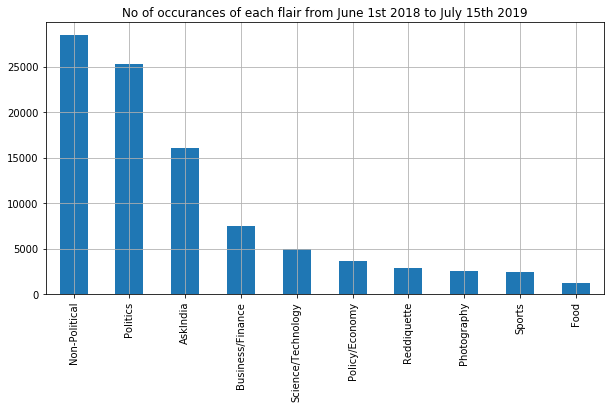

In [5]:
plt.figure(figsize=(10,5))
df.FLAIR.value_counts().plot(kind='bar', legend=False, grid=True)
plt.title("No of occurances of each flair from June 1st 2018 to July 15th 2019")

allowed_tags = ['AskIndia','Non-Political','Politics','Policy/Economy','Sports','Food','Science/Technology','Business/Finance','Photography','Reddiquette']

for i in allowed_tags:
    print(i, " = " ,int(df.FLAIR.str.count(i).sum()))

df.info()



In [82]:
#df = df[df.FLAIR != "Politics"]
#df = df[df.FLAIR != "Non-Political"]
#df = df[df.FLAIR != "AskIndia"]

In [5]:
# dividing data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.TITLE, df.FLAIR, test_size=0.2, random_state = 1)

In [7]:
# timepass

In [7]:
import pandas as pd 
  
data = [["hey,India won the match"]] 
  
# Create the pandas DataFrame 
faltu = pd.DataFrame(data, columns = ['TITLE']) 
  
# print dataframe. 
faltu

,TITLE
0,"hey,India won the match"


accuracy 0.5827975123853695
                    precision    recall  f1-score   support

          AskIndia       0.55      0.61      0.58      3214
  Business/Finance       0.57      0.62      0.59      1448
              Food       0.69      0.34      0.46       258
     Non-Political       0.57      0.52      0.54      5668
       Photography       0.73      0.27      0.39       524
    Policy/Economy       0.52      0.11      0.18       742
          Politics       0.60      0.86      0.71      5041
       Reddiquette       0.27      0.01      0.02       618
Science/Technology       0.58      0.30      0.40       975
            Sports       0.71      0.62      0.66       486

          accuracy                           0.58     18974
         macro avg       0.58      0.43      0.45     18974
      weighted avg       0.57      0.58      0.56     18974



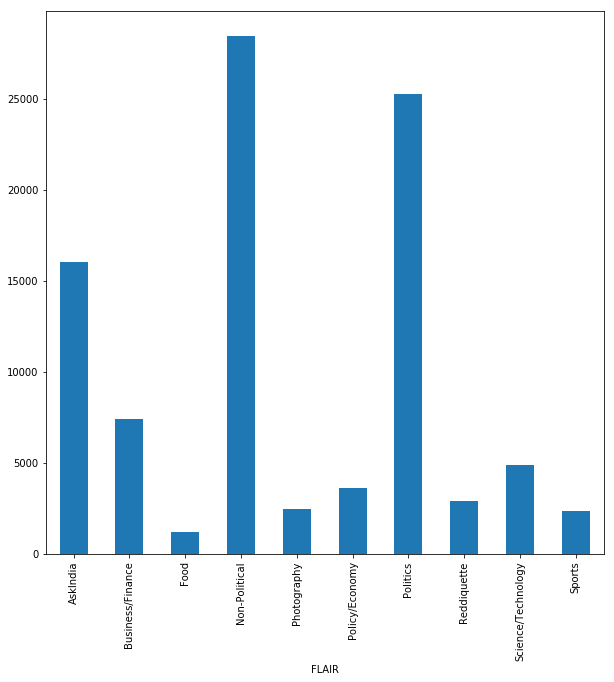

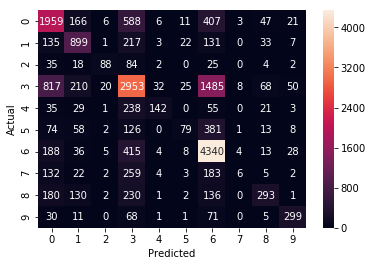

In [8]:
# linear svm

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier( loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
df.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



accuracy 0.5629809212606725
                    precision    recall  f1-score   support

          AskIndia       0.51      0.58      0.55      3214
  Business/Finance       0.67      0.52      0.59      1448
              Food       0.74      0.28      0.41       258
     Non-Political       0.47      0.68      0.56      5668
       Photography       0.61      0.24      0.34       524
    Policy/Economy       0.53      0.16      0.24       742
          Politics       0.72      0.68      0.70      5041
       Reddiquette       0.42      0.05      0.08       618
Science/Technology       0.59      0.23      0.33       975
            Sports       0.75      0.44      0.56       486

          accuracy                           0.56     18974
         macro avg       0.60      0.39      0.44     18974
      weighted avg       0.58      0.56      0.55     18974



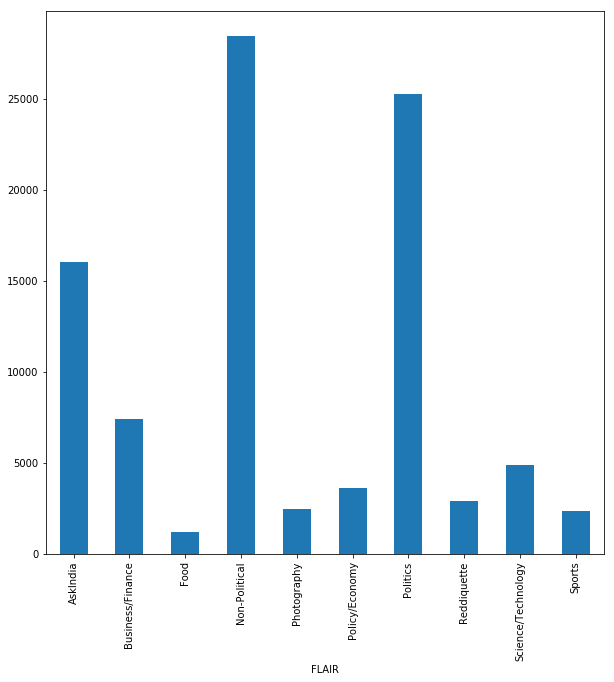

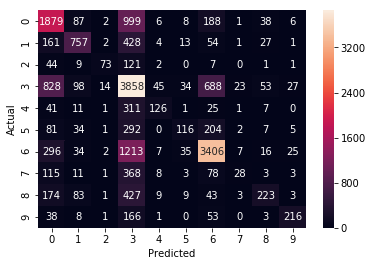

In [10]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier( n_estimators=10)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
df.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


accuracy 0.5425845894381786


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    precision    recall  f1-score   support

          AskIndia       0.59      0.41      0.48      3214
  Business/Finance       0.83      0.45      0.58      1448
              Food       1.00      0.03      0.07       258
     Non-Political       0.45      0.74      0.56      5668
       Photography       1.00      0.05      0.10       524
    Policy/Economy       0.00      0.00      0.00       742
          Politics       0.62      0.78      0.69      5041
       Reddiquette       0.00      0.00      0.00       618
Science/Technology       0.83      0.12      0.21       975
            Sports       0.93      0.11      0.20       486

          accuracy                           0.54     18974
         macro avg       0.62      0.27      0.29     18974
      weighted avg       0.57      0.54      0.50     18974



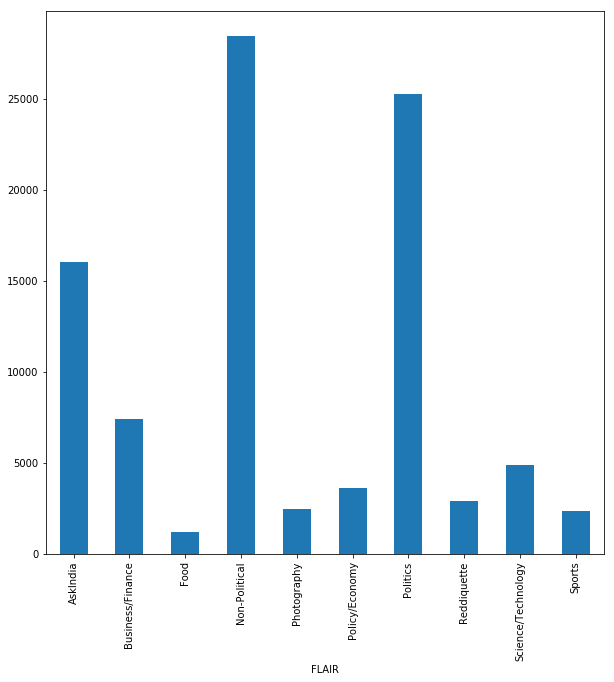

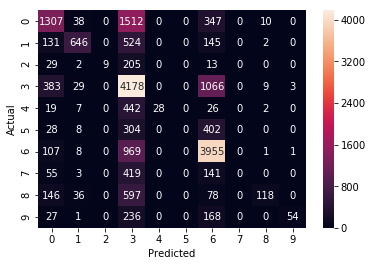

In [11]:
# NAIVE- BAYES

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
df.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


accuracy 0.582047390167805
                    precision    recall  f1-score   support

          AskIndia       0.46      0.71      0.56      4024
  Business/Finance       0.66      0.58      0.62      1931
              Food       0.63      0.34      0.44       289
     Non-Political       0.62      0.47      0.54      7192
       Photography       0.58      0.35      0.43       589
    Policy/Economy       0.36      0.21      0.26       854
          Politics       0.66      0.81      0.73      6251
       Reddiquette       0.17      0.03      0.04       743
Science/Technology       0.57      0.35      0.44      1208
            Sports       0.56      0.62      0.59       637

          accuracy                           0.58     23718
         macro avg       0.53      0.45      0.47     23718
      weighted avg       0.58      0.58      0.57     23718



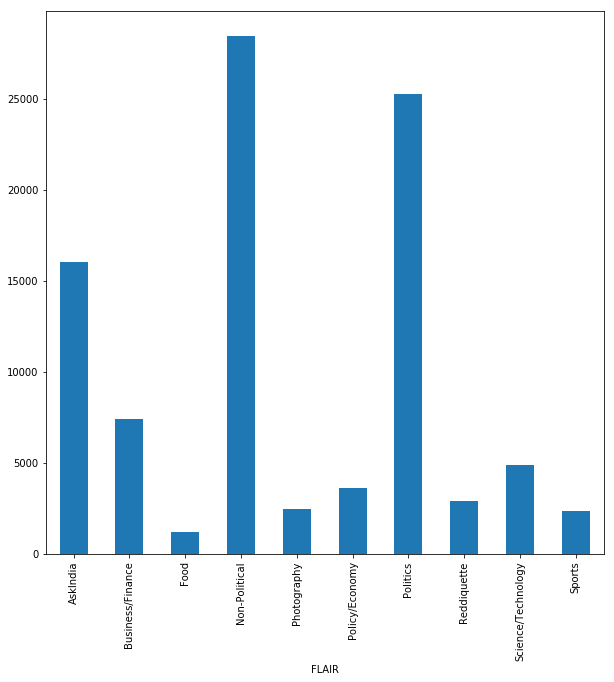

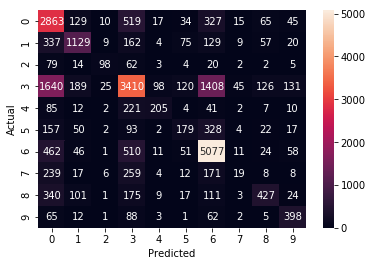

In [19]:
# experimenting
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier



df2 = df
#df2 = df2[df.FLAIR != "Politics"]

X_train, X_test, y_train, y_test = train_test_split(df2['TITLE'], df2['FLAIR'], random_state = 0)


count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


clf = SGDClassifier().fit(X_train_tfidf, y_train)





y_pred = clf.predict((count_vect.transform(X_test)))

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
df2.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
# saving model
import pickle

pickle.dump(clf, open('models/SGDC.pickle','wb'))
pickle.dump(count_vect, open('models/SGDC_vector.pickle','wb'))

In [22]:
import pickle
vectorizer = pickle.load(open('models/SGDC_vector.pickle','rb'))   # loading vector
clf = pickle.load(open('models/SGDC.pickle','rb'))

test = " new samsung S10 is awesome... "
print(clf.predict(vectorizer.transform([test])))
#print((count_vect.transform([test]))==(vectorizer.transform([test])))

test = " delicious cake receipe "
print(clf.predict(count_vect.transform([test])))

test = " hey, india loses the todays match "
print(clf.predict(count_vect.transform([test])))

test = " PM narendra modi is best "
print(clf.predict(count_vect.transform([test])))

test = " snapdeal sale on 21st of January "
print(clf.predict(count_vect.transform([test])))

test = " Ahead of Chandrayaan 2 launch, ISRO chairman K. Sivan offers special prayers at Udupi Krishna mutt "
print(clf.predict(count_vect.transform([test])))

['Science/Technology']
['Food']
['Sports']
['Politics']
['Non-Political']
['Science/Technology']


In [ ]:
# .     using resampling

In [ ]:
# .     Undersample majority classes

In [12]:
from sklearn.model_selection import train_test_split

#df2 = df[df.FLAIR != "Politics"]
#df2 = df2[df.FLAIR != "Non-Political"]
#df2 = df2[df.FLAIR != "AskIndia"]
X_train, X_test, y_train, y_test = train_test_split(df.TITLE, df.FLAIR, test_size=0.2, random_state = 1)


In [13]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
to_reduce = X[X.FLAIR=='Non-Political']
minimum = X[X.FLAIR!='Non-Political']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 3500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Politics              20242
AskIndia              12839
Business/Finance       6004
Science/Technology     3948
Non-Political          3500
Policy/Economy         2916
Reddiquette            2302
Photography            1977
Sports                 1906
Food                    988
Name: FLAIR, dtype: int64

In [14]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Politics']
minimum = downsampled[downsampled.FLAIR!='Politics']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 3000, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

AskIndia              12839
Business/Finance       6004
Science/Technology     3948
Non-Political          3500
Politics               3000
Policy/Economy         2916
Reddiquette            2302
Photography            1977
Sports                 1906
Food                    988
Name: FLAIR, dtype: int64

In [15]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='AskIndia']
minimum = downsampled[downsampled.FLAIR!='AskIndia']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2700, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Business/Finance      6004
Science/Technology    3948
Non-Political         3500
Politics              3000
Policy/Economy        2916
AskIndia              2700
Reddiquette           2302
Photography           1977
Sports                1906
Food                   988
Name: FLAIR, dtype: int64

In [16]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Business/Finance']
minimum = downsampled[downsampled.FLAIR!='Business/Finance']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Science/Technology    3948
Non-Political         3500
Politics              3000
Policy/Economy        2916
AskIndia              2700
Business/Finance      2500
Reddiquette           2302
Photography           1977
Sports                1906
Food                   988
Name: FLAIR, dtype: int64

In [17]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Science/Technology']
minimum = downsampled[downsampled.FLAIR!='Science/Technology']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Non-Political         3500
Politics              3000
Policy/Economy        2916
AskIndia              2700
Business/Finance      2500
Science/Technology    2500
Reddiquette           2302
Photography           1977
Sports                1906
Food                   988
Name: FLAIR, dtype: int64

In [18]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Policy/Economy']
minimum = downsampled[downsampled.FLAIR!='Policy/Economy']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
print(downsampled.FLAIR.value_counts())





Non-Political         3500
Politics              3000
AskIndia              2700
Business/Finance      2500
Policy/Economy        2500
Science/Technology    2500
Reddiquette           2302
Photography           1977
Sports                1906
Food                   988
Name: FLAIR, dtype: int64


In [19]:
# performing ML on downsampled

accuracy 0.48387266786128386
                    precision    recall  f1-score   support

          AskIndia       0.57      0.50      0.53      3214
  Business/Finance       0.45      0.63      0.52      1448
              Food       0.37      0.63      0.46       258
     Non-Political       0.62      0.21      0.32      5668
       Photography       0.26      0.70      0.38       524
    Policy/Economy       0.27      0.53      0.36       742
          Politics       0.73      0.68      0.71      5041
       Reddiquette       0.15      0.31      0.20       618
Science/Technology       0.33      0.52      0.40       975
            Sports       0.28      0.84      0.42       486

          accuracy                           0.48     18974
         macro avg       0.40      0.55      0.43     18974
      weighted avg       0.56      0.48      0.48     18974



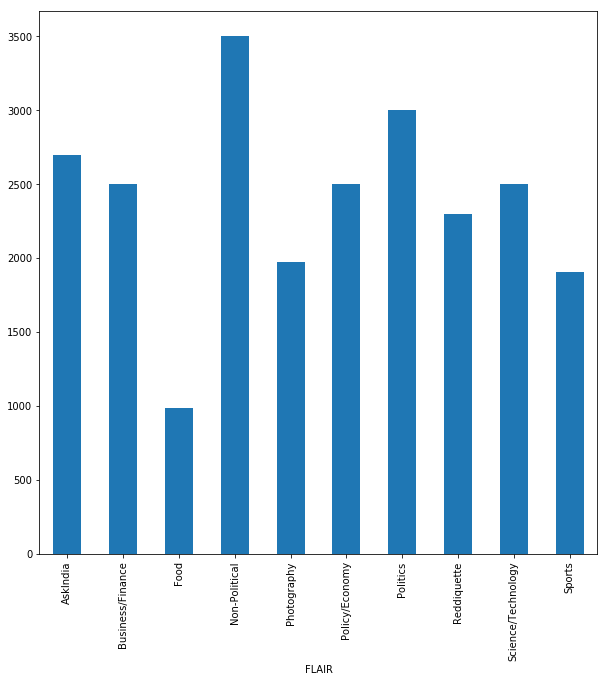

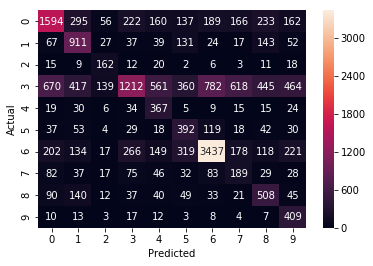

In [20]:
# linear svm
y_train = downsampled.FLAIR
X_train = downsampled.TITLE



from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
downsampled.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


accuracy 0.4471381891008749
                    precision    recall  f1-score   support

          AskIndia       0.45      0.52      0.48      3214
  Business/Finance       0.47      0.53      0.50      1448
              Food       0.14      0.44      0.21       258
     Non-Political       0.49      0.34      0.40      5668
       Photography       0.24      0.50      0.33       524
    Policy/Economy       0.23      0.45      0.31       742
          Politics       0.75      0.51      0.61      5041
       Reddiquette       0.14      0.23      0.18       618
Science/Technology       0.29      0.37      0.33       975
            Sports       0.48      0.64      0.55       486

          accuracy                           0.45     18974
         macro avg       0.37      0.45      0.39     18974
      weighted avg       0.51      0.45      0.46     18974



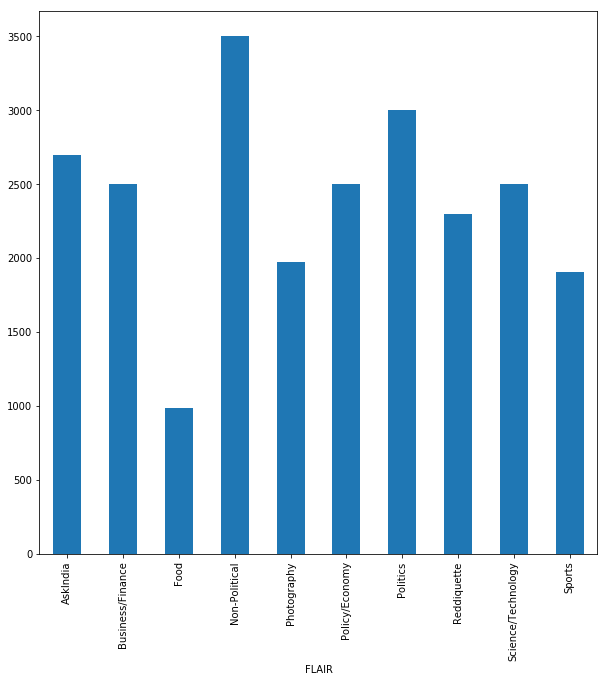

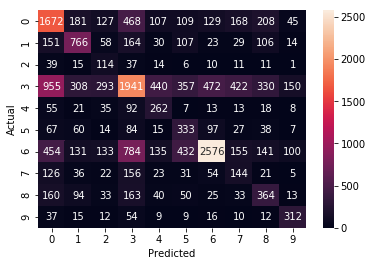

In [21]:
# Random Forest classifier
y_train = downsampled.FLAIR
X_train = downsampled.TITLE



from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=10)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
downsampled.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


accuracy 0.5669336987456519
                    precision    recall  f1-score   support

          AskIndia       0.55      0.54      0.55      3214
  Business/Finance       0.64      0.56      0.60      1448
              Food       0.80      0.23      0.36       258
     Non-Political       0.52      0.56      0.54      5668
       Photography       0.58      0.49      0.53       524
    Policy/Economy       0.30      0.50      0.38       742
          Politics       0.73      0.68      0.70      5041
       Reddiquette       0.28      0.18      0.22       618
Science/Technology       0.45      0.47      0.46       975
            Sports       0.67      0.67      0.67       486

          accuracy                           0.57     18974
         macro avg       0.55      0.49      0.50     18974
      weighted avg       0.58      0.57      0.57     18974



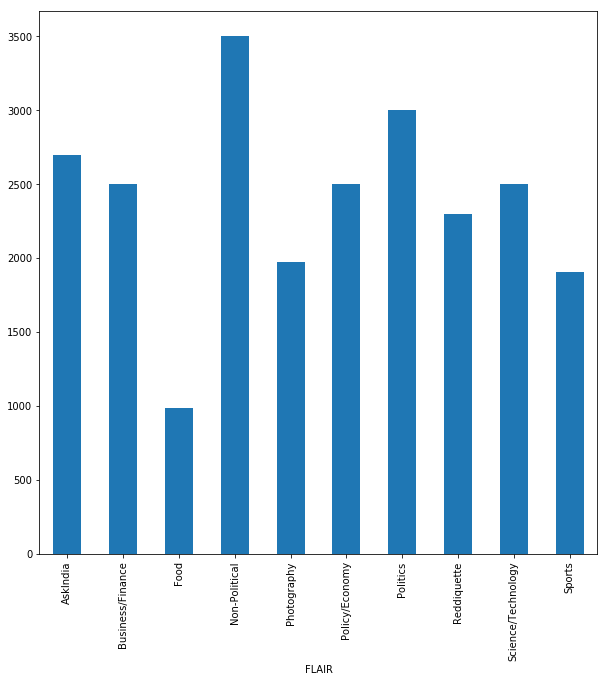

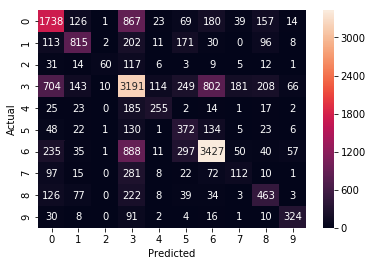

In [22]:
# NAIVE- BAYES
y_train = downsampled.FLAIR
X_train = downsampled.TITLE



from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
downsampled.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
